# LeNet5
[Gradient-Based Learning Applied to Document Recognition](https://d1wqtxts1xzle7.cloudfront.net/61181394/Gradient_Based_Learning_Lecun20191110-2628-k1dtd1.pdf?1573449385=&response-content-disposition=inline%3B+filename%3DGradient_Based_Learning_Lecun.pdf&Expires=1609063666&Signature=cvOPVDwciyy28Kx718WuwMBl~s-PJDH6AXdTEzkW0K1npnWoTsYkXbAWFM4aj5ppegmBEyk5kFaDgjGUQwh2ax7EYPPuYF0-KTIQiaKagbpRa46eprf2OkUXLeVUPefRuYYPUk8qs-86E-VgJ2YTqnFI5VwKE5NdOd9MDmR-IGwftxsRoLg6GbYhsMMOyRfluBC9hTu2eQC8svtqC~8HvxHn1aUQO6URXAqc-6BAAYVrfH94wRSW6DvUmZYicFMtlBzp6mojBIXUHNLzjQgvboa-PxX76-5p3BeMnXzBh38YwF5qTb-W39XICSe4fH1wNSVAhzj~LH3zSxZ0azyfCw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)
- 

## 요약
- Convoultional Layer 2개
- Fully-connected Layer 3개
- Average Pooling Layer 2개
- Activation Function(활성화 함수) : Tanh
- 출력값 Softmax 사용
- 데이터 6만개(MNIST)
- Cost Function(손실함수) : Cross-Entropy

In [151]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

### Datasets

In [152]:
transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5], std=[0.5])])

train_dataset = datasets.MNIST(root='../../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../../data', train=False, download=True, transform=transform)

train_dataset, val_dataset = random_split(train_dataset, (55000, 5000))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

### Visualization

In [153]:
def show_image(x, y, y_pred=None):
    
    x = x[:9, 0, ...]
    y = y[:9]
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(x[i], cmap='gray')
        
        if y_pred is None:
            xlabel = "True: {}".format(y[i])
        else:
            xlabel = "True: {}, Pred: {}".format(y[i], y_pred[i])
            
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

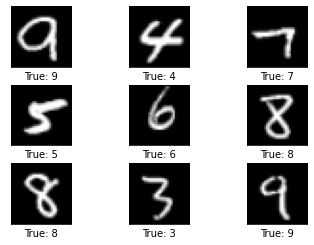

In [154]:
images, labels = iter(train_loader).next()
show_image(images, labels)

### Model

In [155]:
class Lenet5(nn.Module):
    
    def __init__(self):
        super(Lenet5, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.maxpool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = torch.tanh(self.conv1)
        x = self.maxpool(x)
        
        x = torch.tanh(self.conv2)
        x = self.maxpool(x)
        
        x = self.fc1(x)
        x = self.maxpoo
                